In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### There are no missing values as such

In [5]:
data['region'].value_counts().sort_values()

region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64

In [6]:
data['children'].value_counts().sort_values()

children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64

### Converting Categorical Features to Numerical

In [7]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16544\1986870739.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace(clean_data, inplace=True)


In [8]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


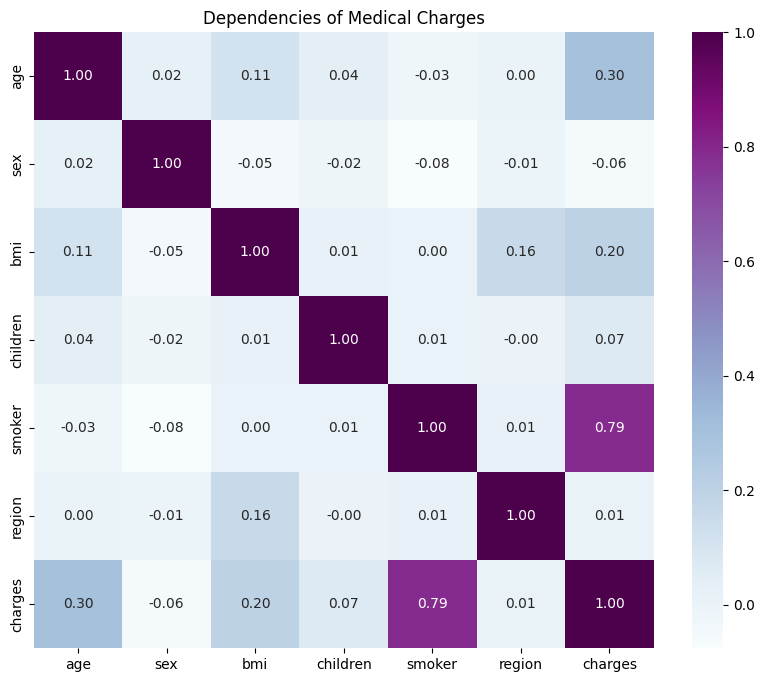

In [9]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('./sampleImages/Cor')
plt.show()

### Smoker, BMI and Age are most important factor that determnines - Charges
Also we see that Sex, Children and Region do not affect the Charges.
We might drop these 3 columns as they have less correlation

In [10]:
print(data['sex'].value_counts().sort_values()) 
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

sex
female    662
male      676
Name: count, dtype: int64
smoker
yes     274
no     1064
Name: count, dtype: int64
region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64


### Now we are confirmed that there are no other values in above pre-preocessed column, We can proceed with EDA

C:\Users\DELL\AppData\Local\Temp\ipykernel_16544\504555680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='charges',data=data_copy,palette='husl')


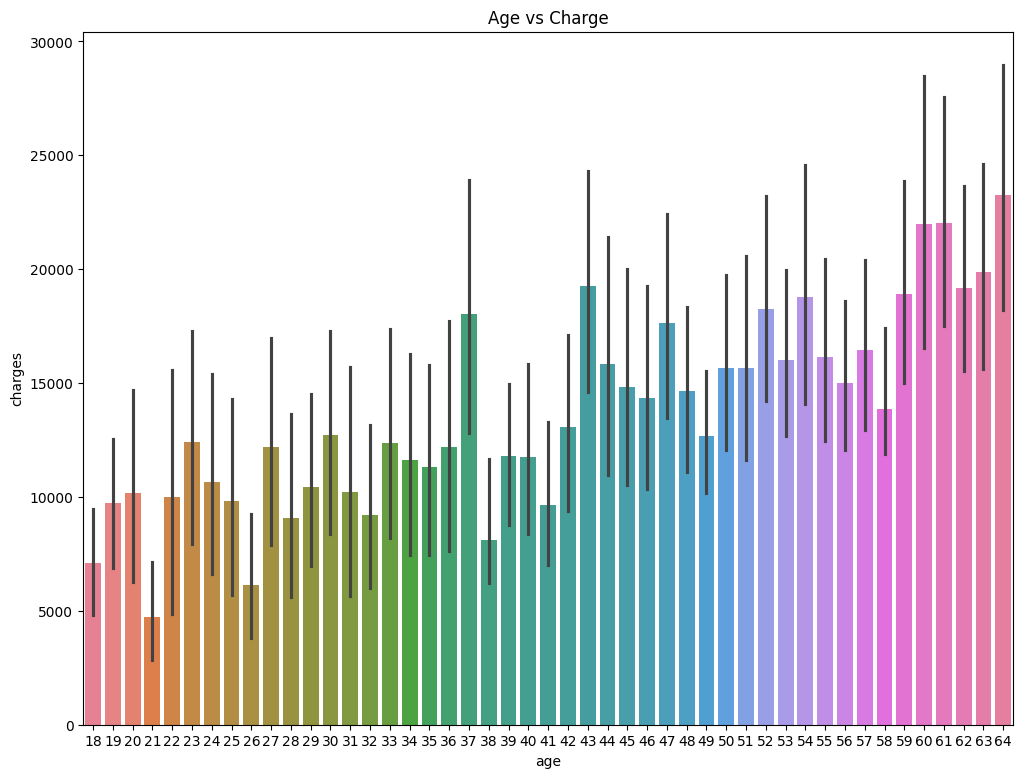

In [11]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')
plt.savefig('./sampleImages/AgevsCharges')

C:\Users\DELL\AppData\Local\Temp\ipykernel_16544\278154647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

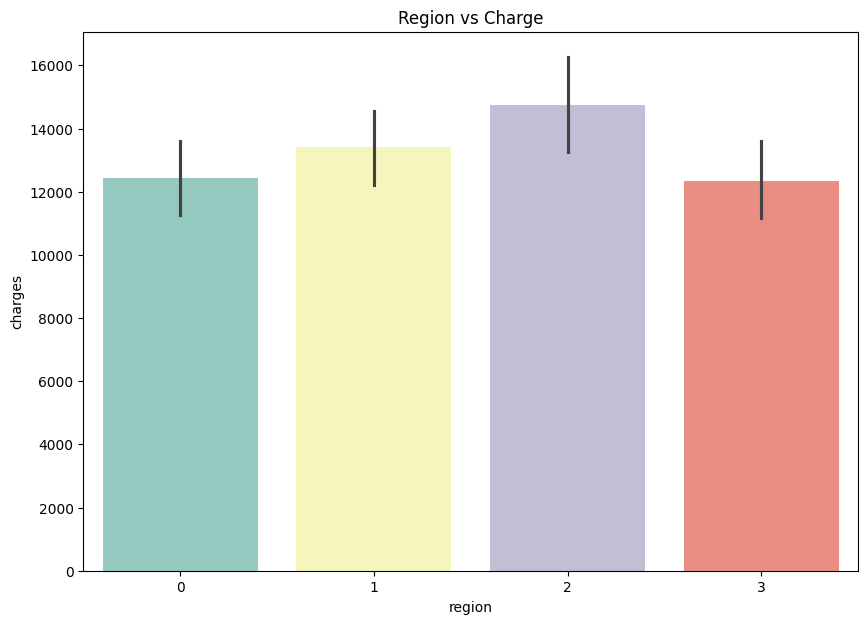

In [12]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

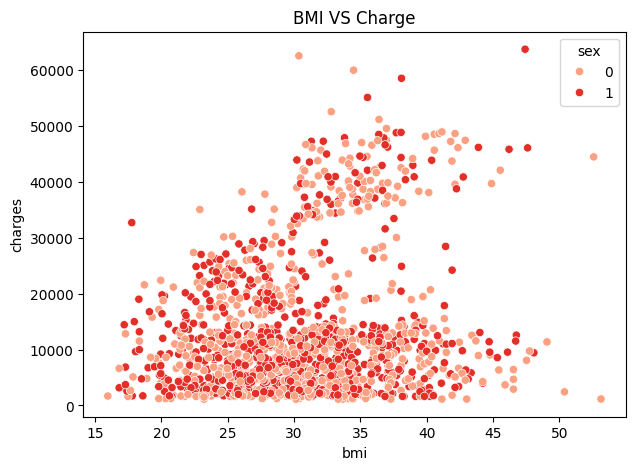

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

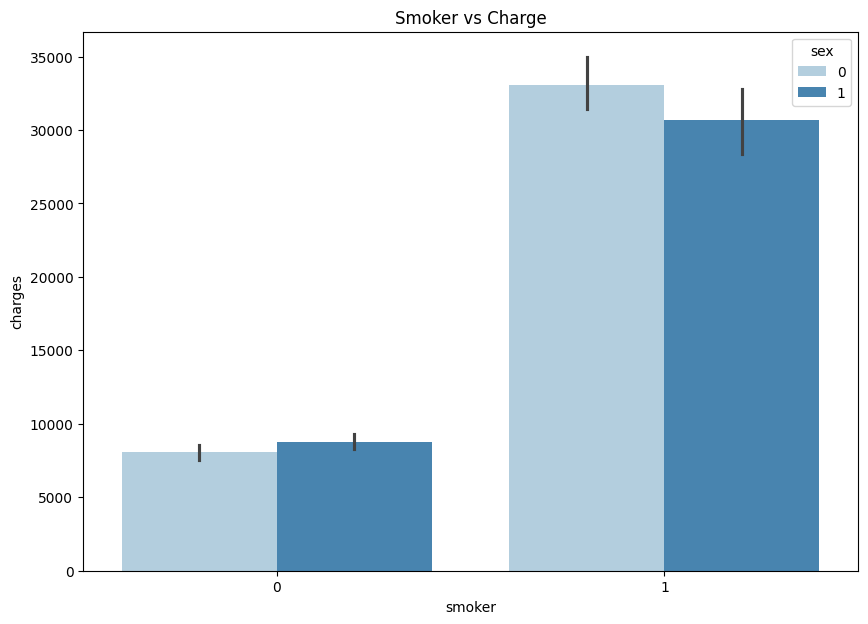

In [14]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')

C:\Users\DELL\AppData\Local\Temp\ipykernel_16544\3378163740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')


<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

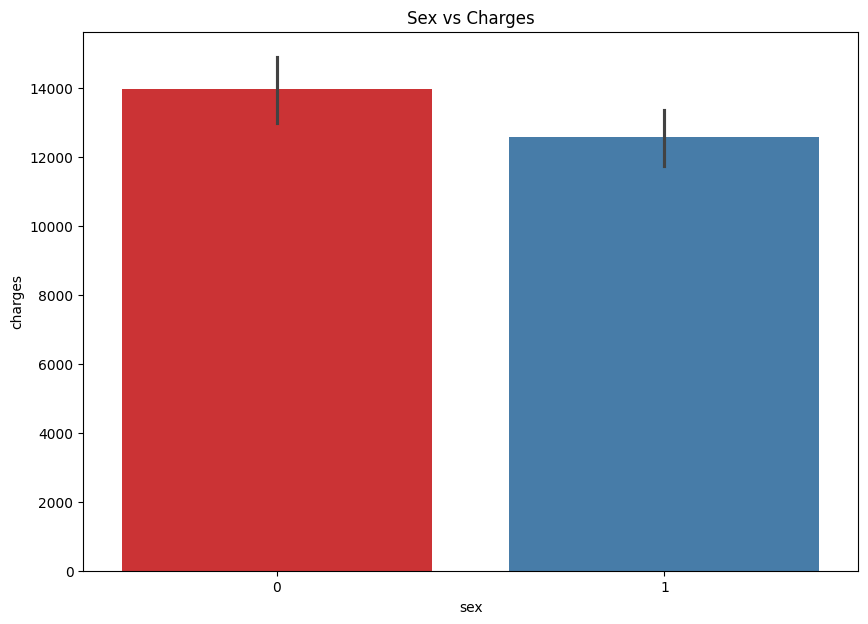

In [15]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')

### Plotting Skew and Kurtosis

In [16]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
charges : Skewness 1.516 and  Kurtosis 1.606


C:\Users\DELL\AppData\Local\Temp\ipykernel_16544\1236474692.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['age'])


Text(0, 0.5, 'Count')

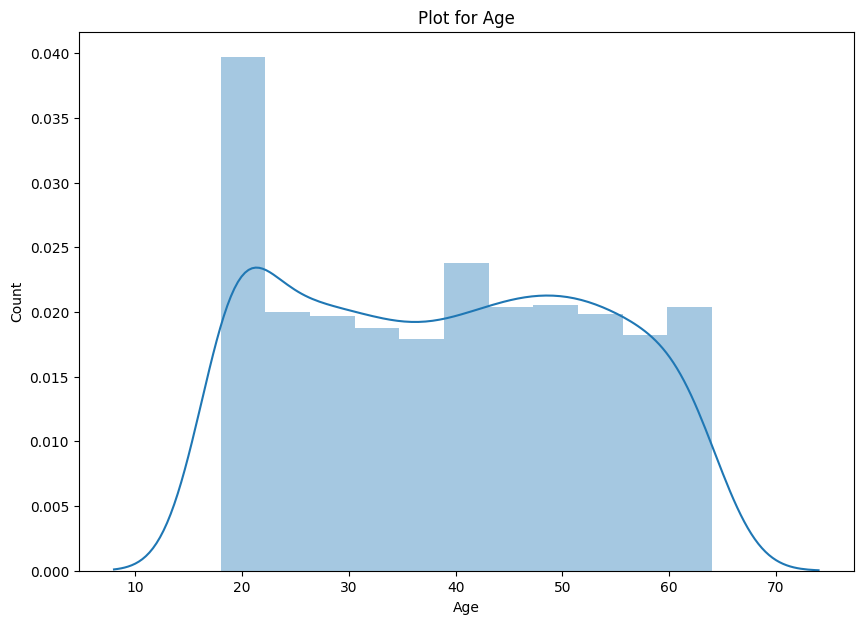

In [17]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

C:\Users\DELL\AppData\Local\Temp\ipykernel_16544\149558255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['bmi'])


Text(0, 0.5, 'Count')

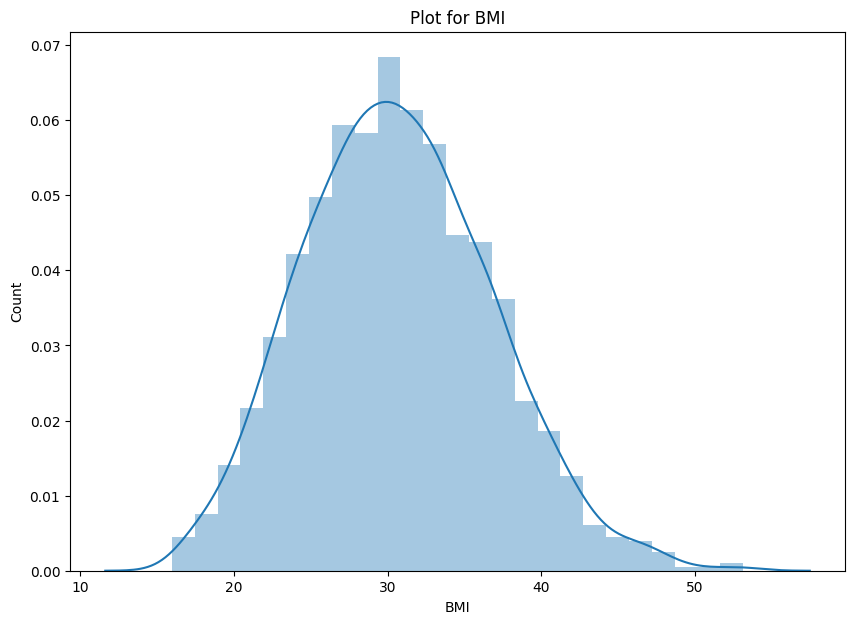

In [18]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

C:\Users\DELL\AppData\Local\Temp\ipykernel_16544\2885443911.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['charges'])


Text(0, 0.5, 'Count')

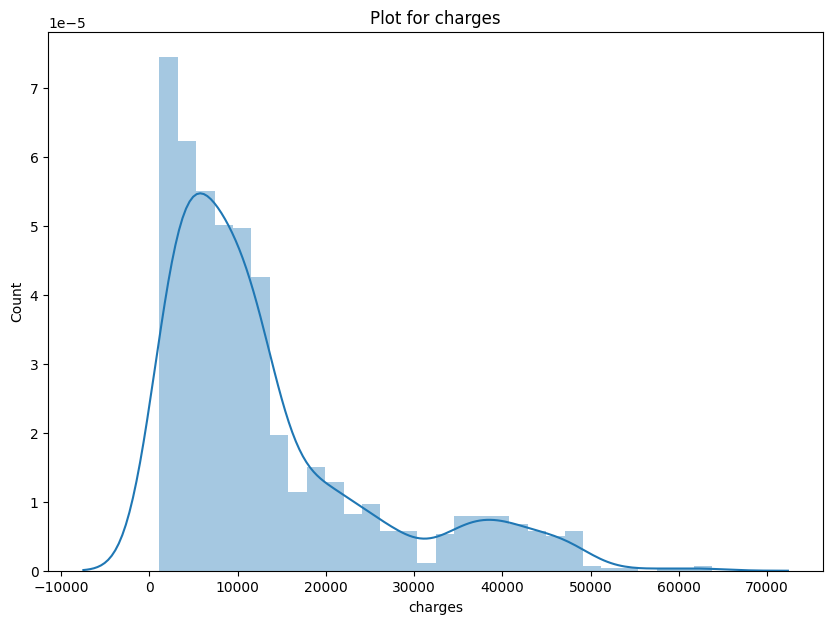

In [19]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

### There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very les actually!

### Prepating data - We can scale BMI and Charges Column before proceeding with Prediction

In [20]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [21]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


## Importing Libraries

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

## Linear Regression

In [23]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 212 ms


LinearRegression()

In [24]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.745
R2_score (train) : 0.741
R2_score (test) : 0.783
RMSE : 0.480


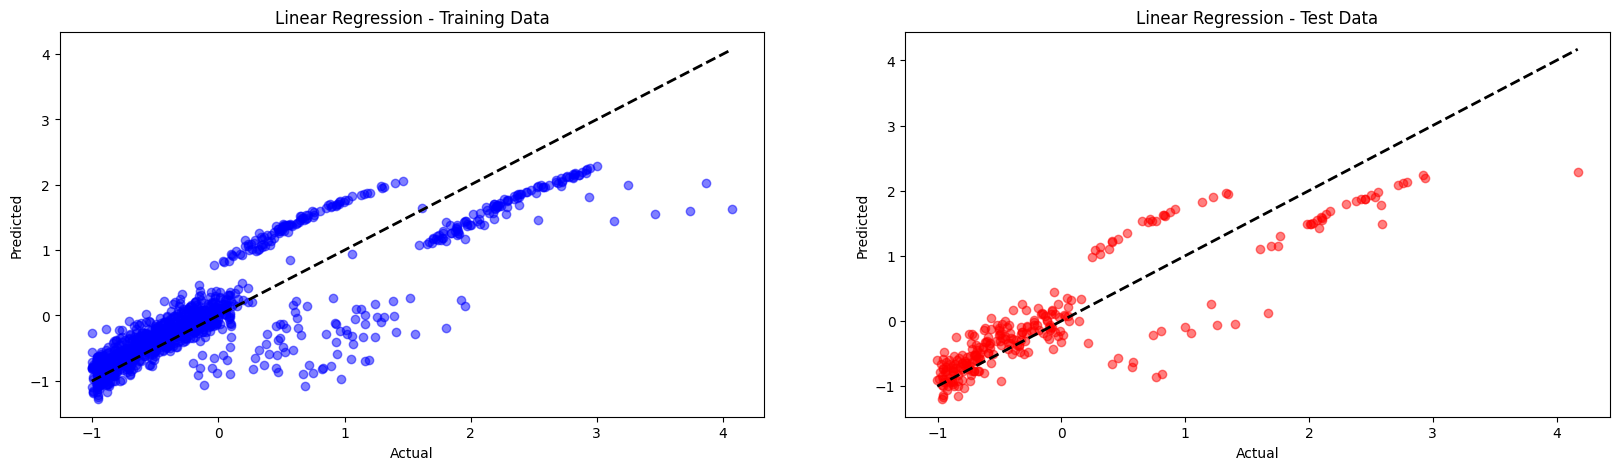

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np# Plotting the predicted vs actual values for training data
plt.figure(figsize=(20, 5))

# Plotting the predicted vs actual values for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_linear_reg_train, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Training Data')

# Plotting the predicted vs actual values for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_linear_reg_test, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Test Data')

plt.show()

## Support Vector Machine (Regression)

In [26]:
X_c = data_copy.drop('charges',axis=1).values
y_c = data_copy['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()
#svr.fit(X_train_scaled, y_train_scaled.ravel())

In [27]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [28]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.1, tol=0.0001)
0.8311276912561502


In [29]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.831
R2_score (train) : 0.857
R2 score (test) : 0.871
RMSE : 0.359


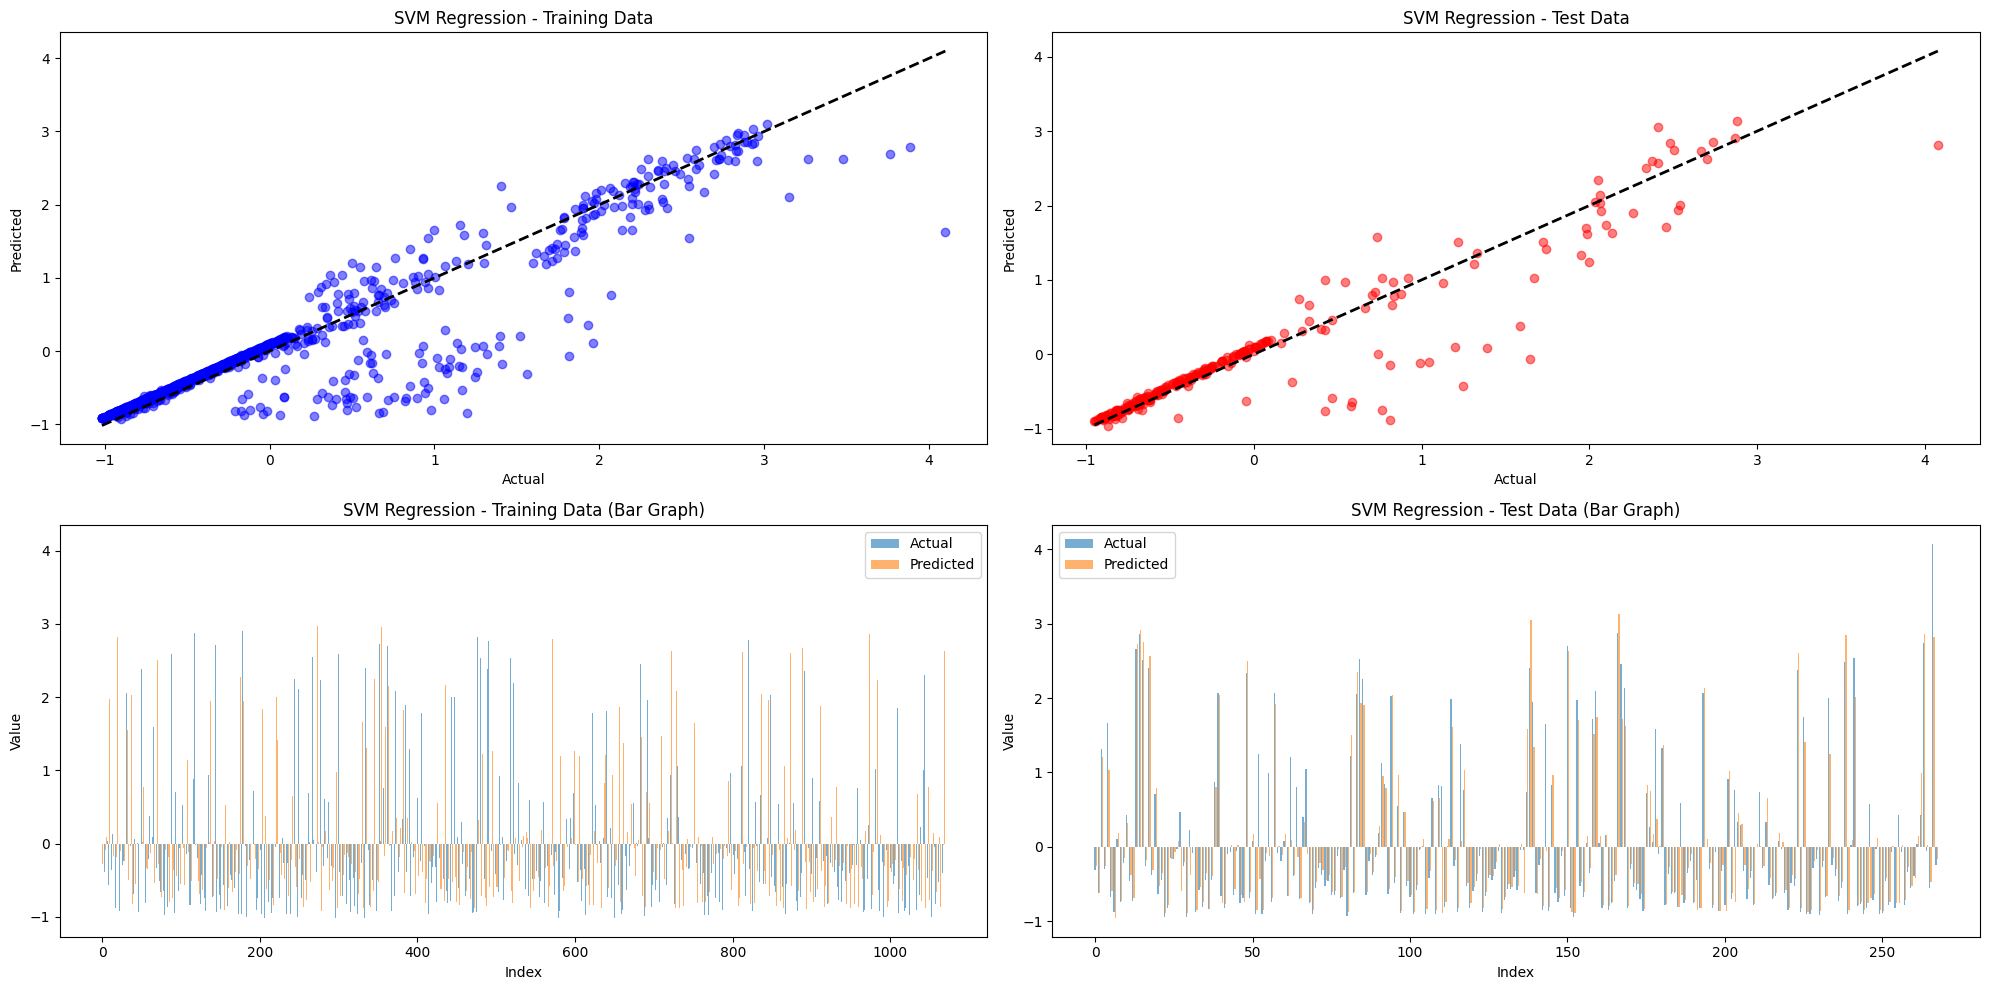

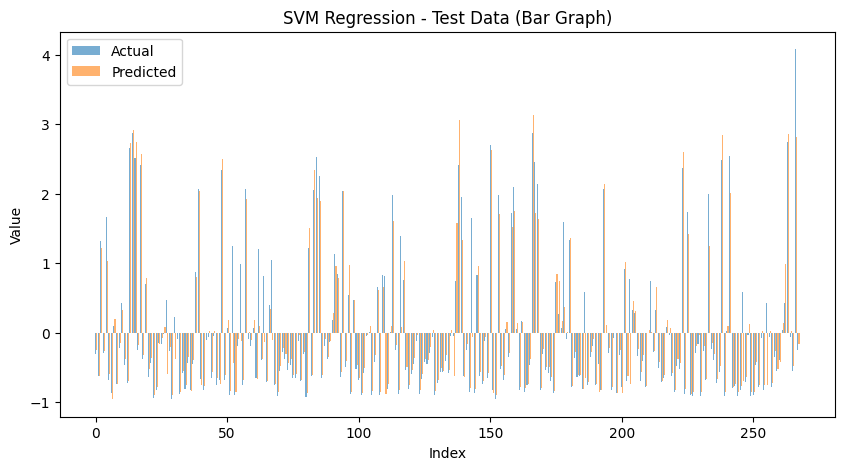

In [30]:
# Plotting the predicted vs actual values for training data
plt.figure(figsize=(20, 10))

# Subplot for training data
plt.subplot(2, 2, 1)
plt.scatter(y_train_scaled, y_pred_svr_train, color='blue', alpha=0.5)
plt.plot([y_train_scaled.min(), y_train_scaled.max()], [y_train_scaled.min(), y_train_scaled.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM Regression - Training Data')

# Subplot for test data
plt.subplot(2, 2, 2)
plt.scatter(y_test_scaled, y_pred_svr_test, color='red', alpha=0.5)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM Regression - Test Data')

# Subplot for bar graph of training data
plt.subplot(2, 2, 3)
indices_train = np.arange(len(y_train_scaled))
plt.bar(indices_train, y_train_scaled.flatten(), width=0.4, label='Actual', alpha=0.6)
plt.bar(indices_train + 0.4, y_pred_svr_train, width=0.4, label='Predicted', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SVM Regression - Training Data (Bar Graph)')
plt.legend()

# Subplot for bar graph of test data
plt.subplot(2, 2, 4)
indices_test = np.arange(len(y_test_scaled))
plt.bar(indices_test, y_test_scaled.flatten(), width=0.4, label='Actual', alpha=0.6)
plt.bar(indices_test + 0.4, y_pred_svr_test, width=0.4, label='Predicted', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SVM Regression - Test Data (Bar Graph)')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting bar graph for predicted vs actual values for test data
plt.figure(figsize=(10, 5))
indices = np.arange(len(y_test_scaled))
plt.bar(indices, y_test_scaled.flatten(), width=0.4, label='Actual', alpha=0.6)
plt.bar(indices + 0.4, y_pred_svr_test, width=0.4, label='Predicted', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SVM Regression - Test Data (Bar Graph)')
plt.legend()
plt.show()

## Ridge Regressor

In [31]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [32]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())

f:\mini project\Medical-Cost-Prediction-master\Medical-Cost-Prediction-master\env\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.25803e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
f:\mini project\Medical-Cost-Prediction-master\Medical-Cost-Prediction-master\env\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.81338e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
f:\mini project\Medical-Cost-Prediction-master\Medical-Cost-Prediction-master\env\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.27216e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [33]:
reg_ridge.best_estimator_, reg_ridge.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 np.float64(0.8259990140429396))

In [ ]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())
cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))
print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

CV : 0.826
R2 score (train) : 0.741
R2 score (test) : 0.784
RMSE : 0.465


## RandomForest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.exceptions import NotFittedError
import numpy as np
# Even more simplified parameter grid
reg_rf = RandomForestRegressor(random_state=42)
parameters = {
    'n_estimators': [600],  # Single value
    'max_features': ['sqrt'],  # Single value
    'max_depth': [40, 50],
    'min_samples_split': [5],
    'min_samples_leaf': [7],
    'criterion': ['squared_error']
}

# Use RandomizedSearchCV instead
random_search = RandomizedSearchCV(
    estimator=reg_rf,
    param_distributions=parameters,
    n_iter=10,  # Limited number of iterations
    cv=3,  # Reduced CV folds
    verbose=2,
    random_state=42,
    n_jobs=2,  # Limit parallel jobs
    return_train_score=False
)

try:
    print("Starting RandomizedSearchCV...")
    random_search.fit(X_train_scaled, y_train_scaled.ravel())
    print("\nBest parameters:", random_search.best_params_)
except Exception as e:
    print(f"Error during search: {e}")

Starting RandomizedSearchCV...


f:\mini project\Medical-Cost-Prediction-master\Medical-Cost-Prediction-master\env\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 2 candidates, totalling 6 fits

Best parameters: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'squared_error'}


In [36]:
random_search.best_score_, random_search.best_estimator_

(np.float64(0.8164903735741698),
 RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=5, n_estimators=600, random_state=42))

In [37]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [38]:
cv_rf = random_search.best_score_

y_pred_rf_train = rf_reg.predict(X_train_scaled)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test_scaled)
r2_score_rf_test = r2_score(y_test_scaled, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.816
R2 score (train) : 0.885
R2 score (test) : 0.879
RMSE : 0.348


NameError: name 'y_train_' is not defined

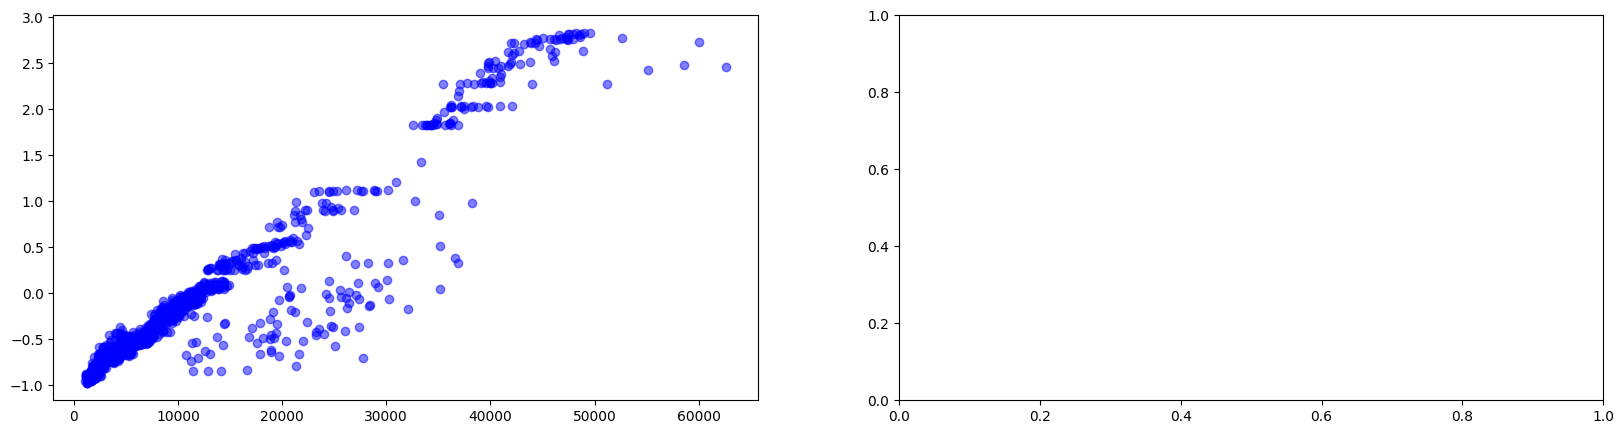

In [41]:
# Plotting the predicted vs actual values for training and test data for Random Forest
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Training data
axes[0].scatter(y_train_c, y_pred_rf_train, color='blue', alpha=0.5)
axes[0].plot([y_train_.min(), y_train_.max()], [y_train_.min(), y_train_.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Random Forest Regression - Training Data')

# Test data
axes[1].scatter(y_test_, y_pred_rf_test_, color='red', alpha=0.5)
axes[1].plot([y_test_.min(), y_test_.max()], [y_test_.min(), y_test_.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Random Forest Regression - Test Data')

plt.show()

# Decision Tree


In [42]:
# Decision Tree Model Evaluation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['squared_error', 'friedman_mse']
}

# Initialize Decision Tree regressor
dt = DecisionTreeRegressor(random_state=42)

# Perform grid search with cross validation
reg_dt_gscv = GridSearchCV(dt, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
reg_dt_gscv.fit(X_train_scaled, y_train)

# Get best model
dt_reg = reg_dt_gscv.best_estimator_

# Get cross validation score
cv_dt = reg_dt_gscv.best_score_

# Make predictions and calculate metrics for training data
y_pred_dt_train = dt_reg.predict(X_train_scaled)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Make predictions and calculate metrics for test data
y_pred_dt_test = dt_reg.predict(X_test_scaled)
r2_score_dt_test = r2_score(y_test_scaled, y_pred_dt_test)

# Calculate RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test_scaled, y_pred_dt_test))

# Print results
print('Best Parameters:', reg_dt_gscv.best_params_)
print('CV Score: {0:.3f}'.format(cv_dt))
print('R2 score (train): {0:.3f}'.format(r2_score_dt_train))
print('R2 score (test): {0:.3f}'.format(r2_score_dt_test))
print('RMSE: {0:.3f}'.format(rmse_dt))



Best Parameters: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV Score: 0.836
R2 score (train): 0.854
R2 score (test): 0.860
RMSE: 0.375


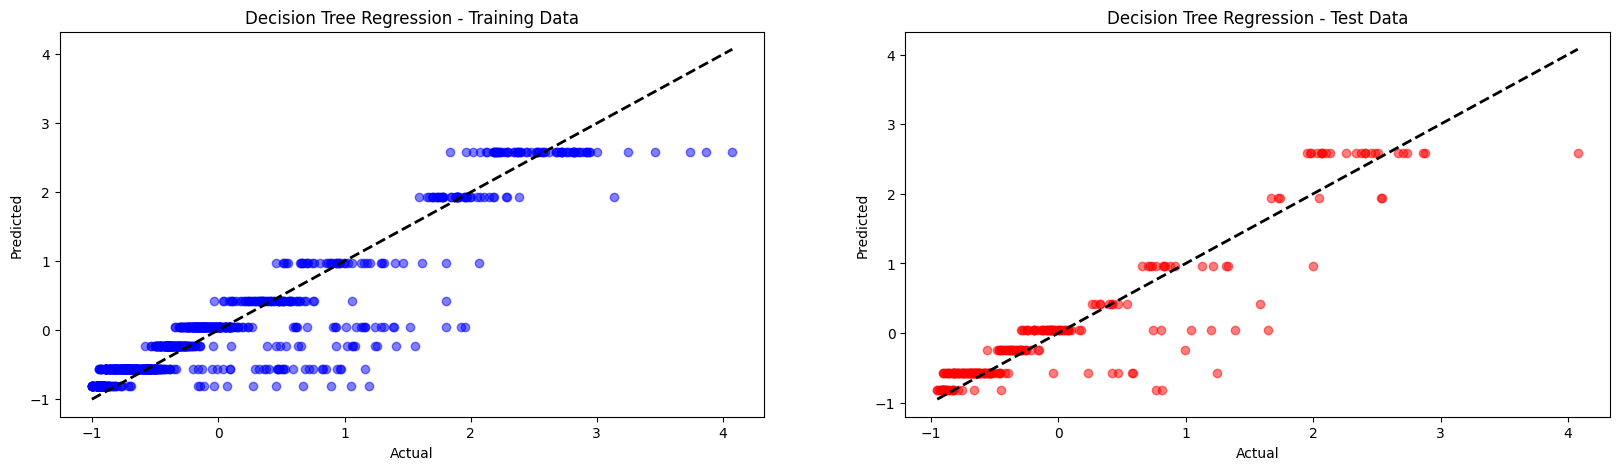

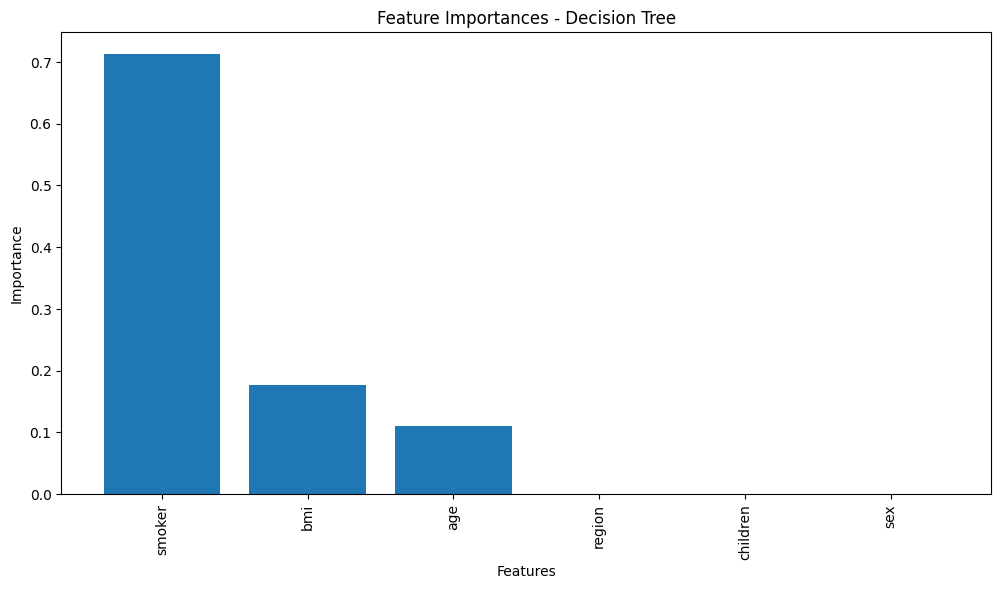

In [43]:
# Plotting the predicted vs actual values for training and test data for Decision Tree
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Training data
axes[0].scatter(y_train, y_pred_dt_train, color='blue', alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Decision Tree Regression - Training Data')

# Test data
axes[1].scatter(y_test_scaled, y_pred_dt_test, color='red', alpha=0.5)
axes[1].plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Decision Tree Regression - Test Data')

plt.show()

# Plotting feature importances
feature_importances = dt_reg.feature_importances_
features = data_copy.drop('charges', axis=1).columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances - Decision Tree')
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
plt.xticks(range(len(feature_importances)), features[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# K Nearest Neighbor

In [44]:
# KNN Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': range(1, 31),  # Increased range for n_neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN regressor
knn = KNeighborsRegressor()

# Perform grid search with cross validation
reg_knn_gscv = GridSearchCV(knn, param_grid_knn, cv=10, scoring='r2', n_jobs=-1)
reg_knn_gscv.fit(X_train_scaled, y_train_scaled.ravel())

# Get best model
knn_reg = reg_knn_gscv.best_estimator_

# Get cross validation score
cv_knn = reg_knn_gscv.best_score_

# Make predictions and calculate metrics for training data
y_pred_knn_train = knn_reg.predict(X_train_scaled)
r2_score_knn_train = r2_score(y_train_scaled, y_pred_knn_train)

# Make predictions and calculate metrics for test data
y_pred_knn_test = knn_reg.predict(X_test_scaled)
r2_score_knn_test = r2_score(y_test_scaled, y_pred_knn_test)

# Calculate RMSE
rmse_knn = np.sqrt(mean_squared_error(y_test_scaled, y_pred_knn_test))

# Print results
print('Best Parameters:', reg_knn_gscv.best_params_)
print('CV Score: {0:.3f}'.format(cv_knn))
print('R2 score (train): {0:.3f}'.format(r2_score_knn_train))
print('R2 score (test): {0:.3f}'.format(r2_score_knn_test))
print('RMSE: {0:.3f}'.format(rmse_knn))


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'distance'}
CV Score: 0.807
R2 score (train): 0.998
R2 score (test): 0.843
RMSE: 0.396


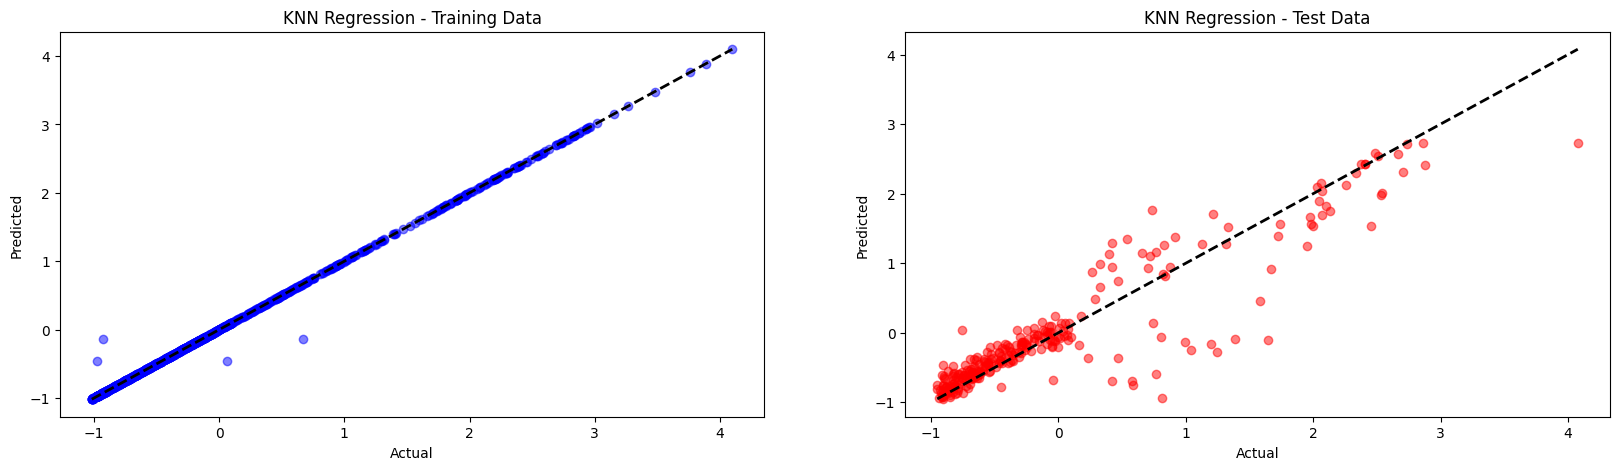

In [45]:
# Plotting the predicted vs actual values for training and test data in a single picture
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Training data
axes[0].scatter(y_train_scaled, y_pred_knn_train, color='blue', alpha=0.5)
axes[0].plot([y_train_scaled.min(), y_train_scaled.max()], [y_train_scaled.min(), y_train_scaled.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('KNN Regression - Training Data')

# Test data
axes[1].scatter(y_test_scaled, y_pred_knn_test, color='red', alpha=0.5)
axes[1].plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('KNN Regression - Test Data')

plt.show()

# Conclusion


In [46]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt),
          ('K Nearest Neighbor Regression', rmse_knn, r2_score_knn_train, r2_score_knn_test, cv_knn)
         ]

In [47]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)'*100, 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test)R2_Score(test),Cross-Validation
0,Linear Regression,0.479808,0.741410,0.782694,0.744528
1,Ridge Regression,0.465206,0.741150,0.783800,0.825999
2,Support Vector Regression,0.358769,0.857235,0.871285,0.831128
3,Random Forest Regression,0.347806,0.884630,0.879031,0.816490
4,Decision Tree Regression,0.374589,0.853670,0.859683,0.835688
5,K Nearest Neighbor Regression,0.395789,0.998308,0.843351,0.807388


C:\Users\DELL\AppData\Local\Temp\ipykernel_16544\4031156405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')


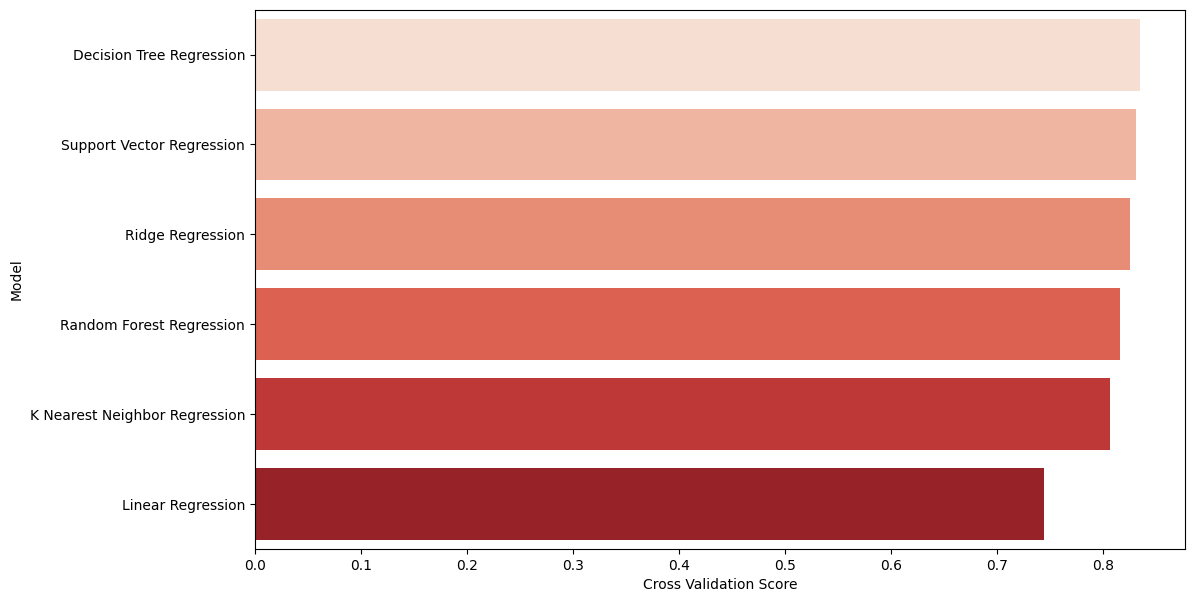

In [48]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16544\2628962382.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2_Score_Test', y='Model', data=r2_test_df, palette='viridis')


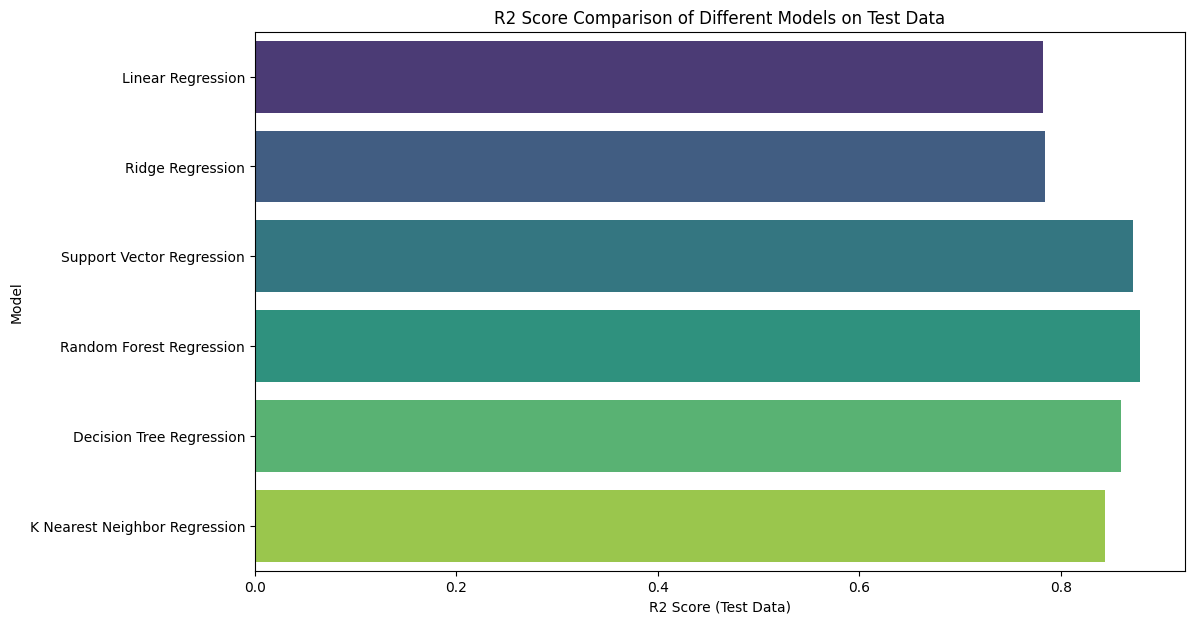

In [49]:
# Create a list of models and their R2 scores on the test data
models_r2_test = [
    ('Linear Regression', r2_score_linear_reg_test),
    ('Ridge Regression', r2_score_ridge_test),
    ('Support Vector Regression', r2_score_svr_test),
    ('Random Forest Regression', r2_score_rf_test),
    ('Decision Tree Regression', r2_score_dt_test),
    ('K Nearest Neighbor Regression', r2_score_knn_test)
]

# Convert the list to a DataFrame
r2_test_df = pd.DataFrame(models_r2_test, columns=['Model', 'R2_Score_Test'])

# Plot the R2 scores
plt.figure(figsize=(12, 7))
sns.barplot(x='R2_Score_Test', y='Model', data=r2_test_df, palette='viridis')
plt.xlabel('R2 Score (Test Data)')
plt.ylabel('Model')
plt.title('R2 Score Comparison of Different Models on Test Data')
plt.show()

## Training Data without Scaling for RandomClassifier

In [50]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [51]:
X_ = data_copy.drop('charges',axis=1).values
y_ = data_copy['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of X_test_ : ', X_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

Size of X_train_ :  (1070, 6)
Size of y_train_ :  (1070, 1)
Size of X_test_ :  (268, 6)
Size of Y_test_ :  (268, 1)


In [52]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_, y_train_.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [53]:
y_pred_rf_train_ = rf_reg.predict(X_train_)
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(X_test_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

R2 score (train) : 0.884
R2 score (test) : 0.878


In [54]:
import pickle

Pkl_Filename = "rf_tuned.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_reg, file)

In [55]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    rf_tuned_loaded = pickle.load(file)

In [56]:
rf_tuned_loaded

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [57]:
pred=rf_tuned_loaded.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

In [58]:
print('{0:.3f}'.format(pred))

19068.340
